# Default Values for Matplotlib's "inline" backend

[back to overview page](index.ipynb)

Long story short, you should add some things to your IPython configuration file.
Typically, this file is located at `~/.ipython/profile_default/ipython_kernel_config.py`.
In case of doubt, you can find your profile directory with this command:

    python3 -m IPython profile locate

If you want to share the settings with your collaborators,
you can also create a file named `ipython_kernel_config.py`
in the directory where your notebooks live.
If you are using Git to manage your files,
don't forget to commit this local configuration file to your repository.
Different directories can have different local configurations.

In most cases, plots look best when using the SVG format.
To enable SVG plots, use this in your IPython configuration:

```python
c.InlineBackend.figure_formats = {'svg'}
```

If you also want to export to LaTeX/PDF, you should enable PDF plots on top of that:

```python
c.InlineBackend.figure_formats = {'svg', 'pdf'}
```

If you want to keep using the default PNG plots,
or if you want to use double resolution HiDPI (a.k.a. `'png2x'`, a.k.a. `'retina'`) plots,
you should still change the default DPI (= "dots per inch") setting:

```python
c.InlineBackend.rc = {'figure.dpi': 96}
```

The default value of 72 DPI is only appropriate for
the [Qt Console](https://qtconsole.readthedocs.io/).
With a setting of 96 DPI, the PNG plots will have about the same size
as the SVG and PDF plots.
Also, when properly converted to LaTeX/PDF and printed on paper,
the figure size in inch will correspond to the actual size of the plot.

If you are planning to save your SVG plots as part of your notebooks,
you should be aware that an SVG file typically contains a few auto-generated
(random-looking) IDs for cross-references between elements.
Whenever you re-execute your notebooks, the SVG plots will be re-generated
with new, seemingly random IDs.
This can be very annoying because the SVG content changes even if the plot itself doesn't change.
Luckily, since
[Matplotlib 2.0.0](https://matplotlib.org/users/prev_whats_new/whats_new_2.0.0.html#added-svg-hashsalt-key-to-rcparams)
there is a configuration parameter to control the generation of those IDs:
`'svg.hashsalt'`.
Just set it to whatever string you fancy, and all new IDs will be generated
deterministically based on this value:

```python
c.InlineBackend.rc = {
    'figure.dpi': 96,
    'svg.hashsalt': 'python-audio',
}
```

<div class="alert alert-warning">

The downside of this setting is that if more than one file is generated using deterministic identifiers and they end up as parts of one larger document, the identifiers can collide and cause the different parts to affect each other.

</div>

If you want to make the above settings work on https://mybinder.org/,
just put them in a file named
`.ipython/profile_default/ipython_kernel_config.py` in your repository.
A local `ipython_kernel_config.py` in the same directory as your notebooks
also works.

If you want to make those settings work with `nbsphinx`, have a look at https://nbsphinx.readthedocs.io/en/latest/code-cells.html#Plots.

This is all you really need to know, but if you want to read about a few more details, just keep reading.

You might also be interested in [Getting Started with Matplotlib](matplotlib.ipynb).

## Details

The settings of Matplotlib, IPython and Jupyter notebook tend to change from time to time.
Therefore, the information in this notebook might be outdated.
This is the date when it was last executed:

In [1]:
!date +%F

2019-07-26


If that's more than a few months in the past, you should probably not read the rest of this notebook.

You might have noticed that Matplotlib "inline" plots in the Jupyter notebook
are too small by default.

That's because the IPython kernel overwrites the plot resolution to be 72 DPI (= "dots per inch").
This is appropriate for the [Qt Console](https://qtconsole.readthedocs.io/),
but it's too small for the Jupyter notebook.

When using 96 DPI for PNG plots, those are displayed in the same size as SVG plots in the browser.
And they are the same size as PDF plots when used in LaTeX.

The resolution can be changed with the `'figure.dpi'` setting as shown above.

Note that the actual *size* of the plots (in inches) can still be influenced with the `figsize` option.

There are several documented issues regarding plot sizes and resolutions:

* Different DPI settings in Matplotlib vs. Jupyter notebook: https://github.com/matplotlib/matplotlib/issues/9217

* `%matplotlib inline` overwrites previous settings: https://github.com/ipython/ipython/issues/10383

* Matplotlib 2.0 changed `figsize` and DPI: https://github.com/ipython/ipython/issues/10128

* Different size than "notebook" backend: https://github.com/matplotlib/matplotlib/issues/4853

* IPython should use Matplotlib "theme":
  * https://github.com/ipython/ipython/issues/9710
  * https://github.com/ipython/ipykernel/issues/267

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = 4, 9, 7, 20, 6, 33, 13, 23, 16, 62, 8

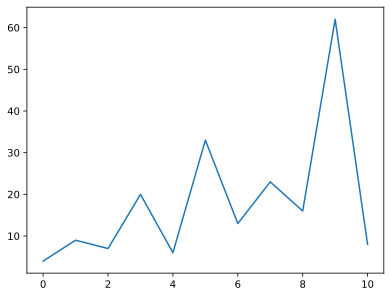

In [4]:
plt.plot(data);

The size, format and resolution of the plot will depend on the settings
of the system where the notebook was executed
and whether it was converted to LaTeX/PDF or not (if there are multiple figure formats).

You can check the current settings like this:

In [5]:
%config InlineBackend.figure_formats

{'svg'}

In [6]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [7]:
plt.rcParams['figure.dpi']

96.0

We can choose the desired figure size with the `figsize` option:

In [8]:
plt.rcParams['figure.figsize'] = 6, 3

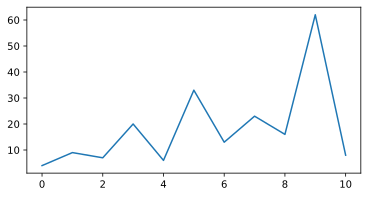

In [9]:
plt.plot(data);

If you set `'figure.figsize'` in the `rcParams`,
this setting will be used for the rest of the notebook.

You can use a different size for an individual figure
by using the `figsize` argument when creating the figure.

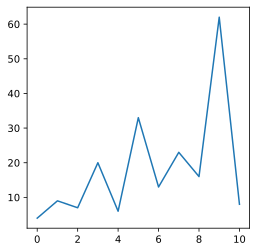

In [10]:
fig, ax = plt.subplots(figsize=[4, 4])
ax.plot(data);

The above plots still use the default figure format (which may be different on your system).

We can force a certain format using the `%config` magic like this:

In [11]:
%config InlineBackend.figure_formats = ['png']

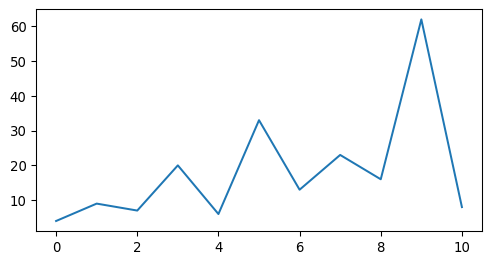

In [12]:
plt.plot(data);

Please note the use of `['png']` instead of `{'png'}`, which would cause a very non-obvious error,
see https://github.com/ipython/ipython/issues/10920.

We can specify more than one format, and the Jupyter client should display the most appropriate one.

In the following example we are using SVG (which should be shown in the browser) and PDF (which should be used when exporting to LaTeX/PDF).

In [13]:
%config InlineBackend.figure_formats = {'svg', 'pdf'}

PDF plots have a similar non-determinism problem like mentioned above for SVG plots.
By default, a creation time-stamp is stored in the PDF plot,
which of course changes with each re-execution,
even if the plot itself didn't change at all.
To avoid this, you can disable the creation time-stamp:

In [14]:
%config InlineBackend.print_figure_kwargs = {'metadata': {'CreationDate': None}}

You can of course also use this in your `ipython_kernel_config.py`,
if needed.

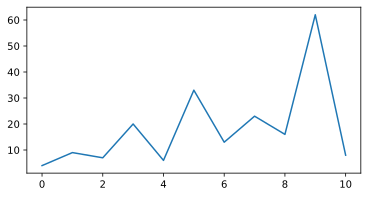

In [15]:
plt.plot(data);

Again, there may be some issues:

* `nbconvert` error with SVG when exporting to PDF/LaTeX:
  https://github.com/jupyter/nbconvert/issues/904,
  https://github.com/jupyter/nbconvert/issues/981
  * solved in https://github.com/jupyter/nbconvert/pull/985 (`nbconvert` version 5.5),
    see also https://github.com/jupyter/nbconvert/pull/910

* Wrong display priority on JupyterLab: https://github.com/jupyterlab/jupyterlab/issues/3038, https://github.com/jupyterlab/jupyterlab/issues/6222
  * solved in https://github.com/jupyterlab/jupyterlab/pull/6255 (JupyterLab version 1.1)

If you have a HiDPI display, there is an option to double the resolution.

This also looks nice when exporting to LaTeX/PDF
(if you for some reason don't want to use PDF plots).

In [16]:
%config InlineBackend.figure_formats = ['retina']

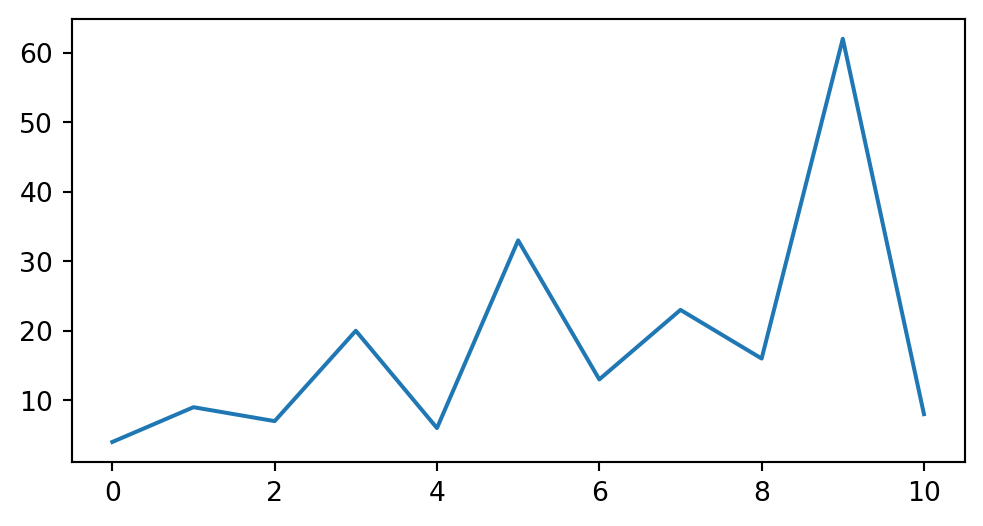

In [17]:
plt.plot(data);

The marketing term `'retina'` is just an alias for `'png2x'`:

In [18]:
%config InlineBackend.figure_formats = ['png2x']

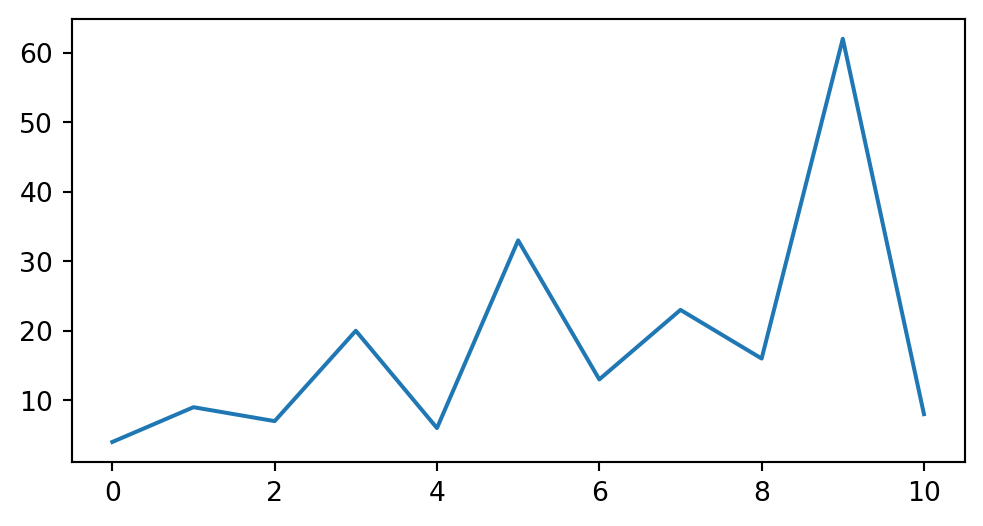

In [19]:
plt.plot(data);

There is a separate DPI setting for saving a plot to a file.
By default, this should be the same as `'figure.dpi'`.

In [20]:
plt.rcParams['savefig.dpi']

'figure'

In [21]:
fig, ax = plt.subplots()
ax.plot(data)
fig.savefig('myfigure01.png')
plt.close(fig)

The saved figure can be used in a Markdown cell like this:

    ![an example plot](myfigure01.png)

And it should be shown here:

![an example plot](myfigure01.png)

You might notice that the saved image has a larger white margin around the figure than what is visible in the previous plots.
This is because by default, IPython uses the `'tight'` setting for `bbox_inches`.

If you prefer the additional white margin, you can set this to `None`:

In [22]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

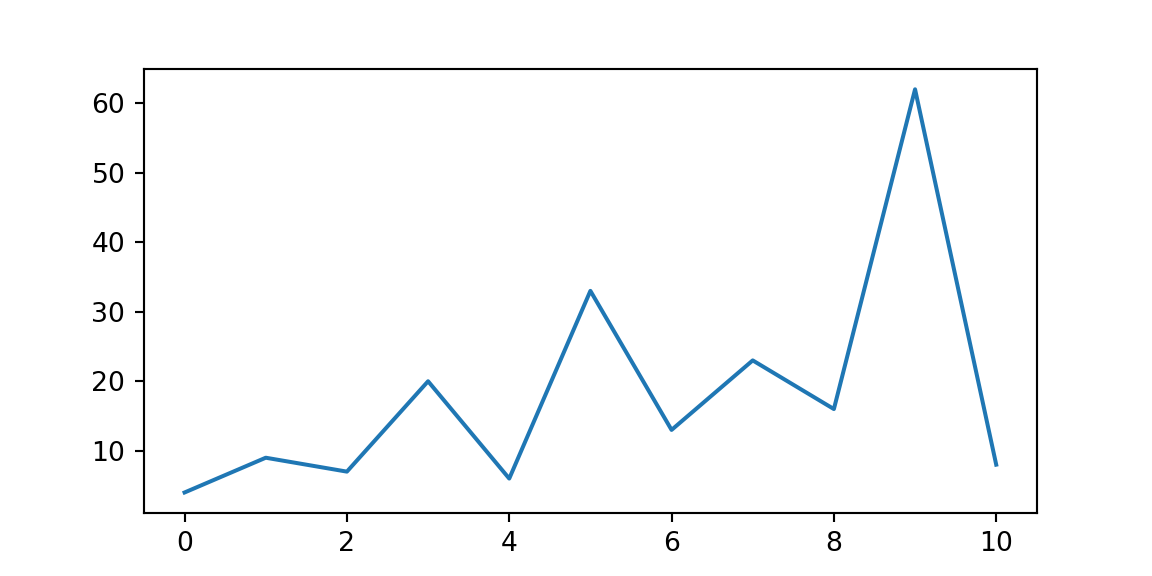

In [23]:
fig

IPython overrides a few Matplotlib default settings.
For version 5.1.0, this can be seen here:

https://github.com/ipython/ipykernel/blob/5.1.0/ipykernel/pylab/config.py#L42-L59

```python
# The typical default figure size is too large for inline use,
# so we shrink the figure size to 6x4, and tweak fonts to
# make that fit.
rc = {
    'figure.figsize': (6.0,4.0),
    # play nicely with white background in the Qt and notebook frontend
    'figure.facecolor': (1,1,1,0),
    'figure.edgecolor': (1,1,1,0),
    # 12pt labels get cutoff on 6x4 logplots, so use 10pt.
    'font.size': 10,
    # 72 dpi matches SVG/qtconsole
    # this only affects PNG export, as SVG has no dpi setting
    'figure.dpi': 72,
    # 10pt still needs a little more room on the xlabel:
    'figure.subplot.bottom' : .125
}
```

These custom settings were added in 2011
(see [fd681b5](https://github.com/ipython/ipykernel/commit/fd681b509c1f7706fd6af8d28dbae437ad411ed6)
and [0459299](https://github.com/ipython/ipykernel/commit/0459299e215abd7ec7c8f93ca0771b26a6ac6b40)).
This was before [the notebook interface was released](https://ipython.org/ipython-doc/dev/whatsnew/version0.12.html#an-interactive-browser-based-notebook-with-rich-media-support),
so it is no wonder that the `'figure.dpi'` setting is not appropriate for it.

Here are Matplotlib's current default values for comparison:

In [24]:
plt.rcParamsDefault['figure.figsize']

[6.4, 4.8]

In [25]:
plt.rcParamsDefault['figure.facecolor']

'white'

In [26]:
plt.rcParamsDefault['figure.edgecolor']

'white'

In [27]:
plt.rcParamsDefault['font.size']

10.0

In [28]:
plt.rcParamsDefault['figure.dpi']

100.0

In [29]:
plt.rcParamsDefault['figure.subplot.bottom']

0.11

## Using a `matplotlibrc` file


All settings from `InlineBackend.rc` can alternatively be specified in a `matplotlibrc` file.
This file should be located in the same directory as the notebook you want it to apply to,
or in one of the configuration directories mentioned in the
[Matplotlib docs](https://matplotlib.org/tutorials/introductory/customizing.html#the-matplotlibrc-file).

For example, the content of the `matplotlibrc` file could look like this:

```
figure.dpi: 96
figure.figsize: 6, 3
svg.hashsalt: python-audio
```

Sadly, `InlineBackend.figure_formats` cannot be specified in a `matplotlibrc` file,
because it is a feature of the IPython kernel, not of Matplotlib.